In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import CompleteHist as ch
%matplotlib qt

In [2]:
se2011 = np.load('2011se.npy')
se52 = np.load('52se.npy')
b1 = np.mean(se52[1][:,1])
b2 = np.mean(se2011[1][:,1])

## TTN Plot Inverse Scale

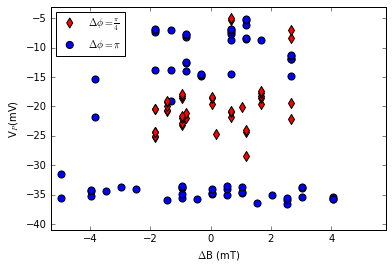

In [3]:
fig1 = plt.figure(1)

s5p = plt.scatter((se52[1][:,1]-b1)*1000,se52[1][:,0],s=50,edgecolor='k')
s5q = plt.scatter((se52[0][:,1]-b1)*1000,se52[0][:,0],s=50,color='r',marker='d',edgecolor='k')
s2q = plt.scatter((se2011[0][:,1]-b2)*1000,se2011[0][:,0],color='r',s=50,marker='d',edgecolor='k')
s2p = plt.scatter((se2011[1][:,1]-b2)*1000,se2011[1][:,0],s=50)


plt.xlim(-5.3,5.8)
plt.ylim(-41,-3)
plt.xlabel('$\Delta$B (mT)')
plt.ylabel('V$_P$(mV)')

plt.legend((s2q,s2p),
           ('$\Delta\phi = \\frac{\pi}{4}$', '$\Delta\phi = \pi$'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)


In [ ]:
se2011[1]

# Generate Figure for Paper

In [4]:

pi11 = [x for x in se2011[0][:,0]]
q11 = ([x for x in se2011[1][:,0]])

pi14 = [x for x in se52[1][:,0]]
q14 = ([x for x in se52[0][:,0]])

In [5]:
a = plt.hist([pi11,q11,pi14,q14],58,label=["$2011 \phi=\pi$","$2011 \phi=\pi/4$","$2014 \phi=\pi$","$2014 \phi=\pi/4$"],color=['#0033cc','#cc0000','#4d79ff','#ff5050'],stacked=True,rwidth=1.2)

In [6]:
#Fig 1
bins = np.arange(0,2.0,.03)
pi = list(se52[1][:,2])
pi.extend(list(se2011[1][:,2]))
q = list(se52[0][:,2])
q.extend(list(se2011[0][:,2]))
plt.hist(pi,bins,label=["$\phi=\pi$"],color=['b'])
plt.hist(q,bins,label=["$\phi=\pi/4$"],color=['r'])
plt.legend()
plt.xlabel('$\Delta \phi$ ($\pi$)')
plt.ylabel('Count')

In [7]:
#Fig 2 better

pi11 = [x for x in se2011[0][:,0]]
q11 = ([x for x in se2011[1][:,0]])

pi14 = [x for x in se52[1][:,0]]
q14 = ([x for x in se52[0][:,0]])

gs = GridSpec(500,1000)
fig = plt.figure()
ax3 = fig.add_subplot(gs[:,:])
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tick_params(axis='y',which='both',bottom='off',top='off',labelleft='off')
ax3.set_ylabel('Count',labelpad=17)
ax1 = fig.add_subplot(gs[:250,:])
ax1.hist([pi14,q14],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off')
plt.yticks([0,2,4], ([0,2,4]))
plt.legend(loc=0)
plt.title('Split Hist, stacked')
ax2 = fig.add_subplot(gs[250:,:])
ax2.hist([pi11,q11],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.yticks([0,2,4,6], ([0,2,4,6]))
ax2.set_xlabel('$V_p$ (mV)')


In [55]:
#All Together
mpl.rcParams.update({'font.size': 7})

gs = GridSpec(1000,1000)
fig = plt.figure(figsize=[2.3*1.5,2.3*2.0])


ax4 = fig.add_subplot(gs[0:400,:])
bins = np.arange(0,2.0,.03)
pi = list(se52[1][:,2])
pi.extend(list(se2011[1][:,2]))
q = list(se52[0][:,2])
q.extend(list(se2011[0][:,2]))
plt.hist(pi,bins,label=["$\phi=\pi$"],color=['b'])
plt.hist(q,bins,label=["$\phi=\pi/4$"],color=['r'])
plt.legend(fontsize=7,markerscale= -1 ,labelspacing= 0 ,borderpad=0.2)
plt.xlabel('$\Delta \phi$ ($\pi$)',labelpad=2)
plt.ylim([0,14.5])
plt.yticks([0,3,6,9,12], ([0,3,6,9,12]))
medp = np.median(pi)
stdp = np.std(pi)
plt.plot([medp]*100,np.linspace(0,14.5,100),c='k',ls='--',lw=1.5)
plt.plot([medp+stdp]*100,np.linspace(0,14.5,100),c='g',ls='--',lw=1.5)
plt.plot([medp-stdp]*100,np.linspace(0,14.5,100),c='g',ls='--',lw=1.5)
medq = np.median(q)
stdq = np.std(q)
plt.plot([medq]*100,np.linspace(0,14.5,100),c='k',ls='--',lw=1.5)
plt.plot([medq+stdq]*100,np.linspace(0,14.5,100),c='g',ls='--',lw=1.5)
plt.plot([medq-stdq]*100,np.linspace(0,14.5,100),c='g',ls='--',lw=1.5)


ax1 = fig.add_subplot(gs[500:740,:])
ax1.hist([pi14,q14],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off')
plt.yticks([0,2,4], ([0,2,4]))
plt.ylim([0,5.5])

ax2 = fig.add_subplot(gs[760:,:])
ax2.hist([pi11,q11],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.yticks([0,2,4,6], ([0,2,4,6]))
plt.xticks([-40,-30,-20,-10],([-40,-30,-20,-10]))
ax2.set_xlabel('$V_p$ (mV)',labelpad=2)
plt.ylim([0,7.5])

plt.savefig('Hist v3',dpi=1200)

In [36]:
print("Pi Median %.6f and std %.6f"%(np.median(pi),np.std(pi)))
print("Pi by 4 Median %.6f and std %.6f"%(np.median(q),np.std(q)))

Pi Median 0.997734 and std 0.087579
Pi by 4 Median 0.272222 and std 0.041510


In [44]:
m = np.median(pi)
[m]*10

[0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419,
 0.99773381027985419]

In [246]:
#Fig 2
pi = [x for x in se2011[1][:,0]]
pi.extend([x for x in se52[1][:,0]])
q = [x for x in se2011[0][:,0]]
q.extend([x for x in se52[0][:,0]])
plt.hist([pi,q],58,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
#plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [ ]:
#Fig 3 and Frequency Function
#Pi
pi = list()
i = 0
while i < len(se2011[1]):
    
    hold = se2011[1][:,0][se2011[1][:,1]==se2011[1][i,1]]
    pi.append(hold)
    i+= len(hold)
i = 0
while i < len(se52[1]):
    
    hold = se52[1][:,0][se52[1][:,1]==se52[1][i,1]]
    pi.append(hold)
    i+= len(hold)
    
pdel = list()
for i in pi:
    i = sorted(i)
    if len(i)==1:
        pdel.append(0)
    else:
        for j in range(len(i)-1):
            pdel.append(i[j+1]-i[j])
            
pfreq=list()
for i in pdel:
    if not i == 0:
        pfreq.append(1.0/i)
    else:
        pfreq.append(0)
#plt.hist(pfreq,100)
##Pi/4------------------------------------------------------------------------
q = list()
i = 0
while i < len(se2011[0]):
    
    hold = se2011[0][:,0][se2011[0][:,1]==se2011[0][i,1]]
    q.append(hold)
    i+= len(hold)
i = 0
while i < len(se52[0]):
    
    hold = se52[0][:,0][se52[0][:,1]==se52[0][i,1]]
    q.append(hold)
    i+= len(hold)
    
qdel = list()
for i in q:
    i = sorted(i)
    if len(i)==1:
        qdel.append(0)
    else:
        for j in range(len(i)-1):
            qdel.append(i[j+1]-i[j])
            
qfreq=list()
for i in qdel:
    if not i == 0:
        qfreq.append(1.0/i)
    else:
        qfreq.append(0)
#plt.hist(qfreq,100)

In [ ]:
pf = list()
for i in pfreq:
    if i >0:
        pf.append(i)
qf = list()
for i in qfreq:
    if i>0:
        qf.append(i)
plt.hist([pf,qf],58,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.xlim([0,8])

In [ ]:
plt.hist([pfreq,qfreq],58,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.xlim([0,8])

In [ ]:
#Playing with Field:

p14b = se52[1][:,1]
q14b = se52[0][:,1]
q11b = se2011[0][:,1]
p11b = se2011[1][:,1]
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
plt.hist([p11b,q11b],20,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True)
#plt.xlim(bmin,bmax)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend()
plt.xlabel('$B$ (T)')
plt.ylabel('Count')
plt.title('2011')

In [ ]:
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
plt.hist([p14b,q14b],20,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True)
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend()
plt.xlabel('$B$ (T)')
plt.ylabel('Count')
plt.title('2014')

In [ ]:
pi = [x for x in se2011[1][:,0]]
pi.extend([x for x in se52[1][:,0]])
q = [x for x in se2011[0][:,0]]
q.extend([x for x in se52[0][:,0]])

In [ ]:
plt.hist(pi,np.arange(min(pi),max(pi),.6))

In [ ]:
plt.hist(q,np.arange(min(q),max(q),.6))

In [ ]:
pi11 = [x for x in se2011[1][:,0]]
pi14 = ([x for x in se52[1][:,0]])
plt.hist(pi11,np.arange(-40,-5,.6),label="2011")
plt.hist(pi14,np.arange(-40,-5,.6),label="2014",color='r')
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.title('$\pi$')

In [ ]:
q11 = [x for x in se2011[0][:,0]]
q14 = ([x for x in se52[0][:,0]])
plt.hist(q11,np.arange(-40,-5,.6),label="2011")
plt.hist(q14,np.arange(-40,-5,.6),label="2014",color='r')
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [ ]:
q11 = [x for x in se2011[0][:,0]]
q11.extend([x for x in se52[0][:,0]])
plt.hist(q11,np.arange(-40,-5,.6))
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [223]:
pi11 = [x for x in se2011[1][:,0]]
q11 = ([x for x in se2011[0][:,0]])
plt.hist(pi11,np.arange(-40,-10,.6),label="$\phi=\pi$")
plt.hist(q11,np.arange(-40,-10,.6),label="$\phi=\pi/4$",color='r')
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [224]:
pi14 = [x for x in se52[1][:,0]]
q14 = ([x for x in se52[0][:,0]])
plt.hist(pi14,np.arange(-30,-5,.6),label="$\phi=\pi$")
plt.hist(q14,np.arange(-30,-5,.6),label="$\phi=\pi/4$",color='r')
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [ ]:
plt.hist([pi,q],58,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],rwidth=1.2)
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.title('Single Hist, Superimposed')

In [ ]:
plt.hist([pi,q],58,label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
#plt.hist(q,np.arange(-40,-5,.6),label="$\phi=\pi/4$",color='r')
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.title('Single Hist, Stacked')

In [ ]:
plt.hist(pi11,60,label="$\phi=\pi$",color='b',stacked=True)
plt.hist(q11,np.arange(-40,-5,.6),label="$\phi=\pi/4$",color='r',stacked=True)
#plt.hist(pi14,np.arange(-40,-5,.6),color='b',stacked=True)
#plt.hist(q14,np.arange(-40,-5,.6),color='r',stacked=True)
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')

In [ ]:
plt.hist([pi11,q11,pi14,q14],58,label=["$2011 \phi=\pi$","$2011 \phi=\pi/4$","$2014 \phi=\pi$","$2014 \phi=\pi/4$"],color=['#0033cc','#cc0000','#4d79ff','#ff5050'],stacked=True,rwidth=1.2)
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.title('Multiple Hist, Stacked')

In [226]:
a = plt.hist([pi11,q11,pi14,q14],58,label=["$2011 \phi=\pi$","$2011 \phi=\pi/4$","$2014 \phi=\pi$","$2014 \phi=\pi/4$"],color=['#0033cc','#cc0000','#4d79ff','#ff5050'],stacked=True,rwidth=1.2)


In [227]:
hq14, bins, p = plt.hist(q14,a[1])
hp14, bins, p = plt.hist(pi14,a[1])
hp11, bins, p = plt.hist(pi11,a[1])
hq11, bins, p = plt.hist(q11,a[1])

In [229]:
plt.bar(x,hq14,width=0.6,color='r',label='$\phi=\pi/4$',align='center')
plt.bar(x,hp14,width=0.6,color='b',label='$\phi=\pi$',align='center')
plt.bar(x,hq11*-1.0,width=0.6,color='r',align='center')
plt.bar(x,hp11*-1.0,width=0.6,color='b',align='center')


plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.yticks([-8,-6,-4,-2,0,2,4], np.abs([-8,-6,-4,-2,0,2,4]))
plt.ylim([-10,6])
plt.xlim([x[0]-0.3,x[-1]+0.3])
plt.legend(loc=1)
plt.title('Verticle Split Hist, Stacked')

In [228]:
x= list()
for i in range(0,len(a[1])-1):
    x.append((a[1][i]+a[1][i+1])/2)

In [ ]:
hp11, bins, p = plt.hist(pi11,np.arange(-40,-5,.6))

In [ ]:
t = plt.hist(q14,np.arange(-40,-5,.6))

In [ ]:
plt.bar(x,a[0][3],width=0.6,color='r')

In [ ]:
plt.bar(x,hp14,width=0.6,color='b',label='$\phi=\pi$')

In [ ]:
plt.bar(x,hq14,width=0.6,color='r',label='$\phi=\pi/4$')

In [ ]:
plt.bar(x,hp11*-1.0,width=0.6,color='b')

In [ ]:
plt.bar(x,hq11*-1.0,width=0.6,color='r')

In [ ]:
hq14[29]= 1.0

In [ ]:
for i in range(len(hp11)):
    if hp11[i] != 0:
        if hq11[i] != 0:
            print i

In [ ]:
hq11[1] = 1.0

In [ ]:
hq14[29]

In [ ]:
x[29]

In [ ]:
superimpp14 = [1.0,x[30]]
superimpq14 = [1.0,x[30]]
superimpp11 = [-1.0,x[1]]
superimpq11 = [-1.0,x[1]]

In [230]:
plt.bar(x,hq14,width=0.6,color='r',label='$\phi=\pi/4$',align='center')
plt.bar(x,hp14,width=0.6,color='b',label='$\phi=\pi$',align='center')
plt.bar(x,hq11*-1.0,width=0.6,color='r',align='center')
plt.bar(x,hp11*-1.0,width=0.6,color='b',align='center')
plt.bar(superimpp14[1]+0.15,superimpp14[0],color='b',width=0.3,align='center')
plt.bar(superimpq14[1]-0.15,superimpq14[0],color='r',width=0.3,align='center')
plt.bar(superimpp11[1]+0.15,superimpp11[0],color='b',width=0.3,align='center')
plt.bar(superimpq11[1]-0.15,superimpq11[0],color='r',width=0.3,align='center')

plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.yticks([-8,-6,-4,-2,0,2,4], np.abs([-8,-6,-4,-2,0,2,4]))
plt.ylim([-10,6])
plt.xlim([x[0]-0.3,x[-1]+0.3])
plt.legend(loc=1)
plt.title('Verticle Split Hist, Superimposed')

NameError: name 'superimpp14' is not defined

In [ ]:
q14

In [ ]:
plt.hist([pi11,q11,pi14,q14],58,label=["$2011 \phi=\pi$","$2011 \phi=\pi/4$","$2014 \phi=\pi$","$2014 \phi=\pi/4$"],color=['#4d79ff','#ff5050','#0033cc','#cc0000'],stacked=True,rwidth=1.2)
plt.legend()
plt.xlabel('$V_p$ (mV)')
plt.ylabel('Count')
plt.title('Multiple Hist, Stacked')

In [ ]:
from matplotlib.gridspec import GridSpec

In [232]:
gs = GridSpec(500,1000)
fig = plt.figure()
ax1 = fig.add_subplot(gs[:250,:])
ax1.hist([pi14,q14],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off')
plt.yticks([0,1,2,3], ([0,1,2,3]))
plt.legend(loc=0)
plt.title('Split Hist, stacked')
ax2 = fig.add_subplot(gs[250:,:])
ax2.hist([pi11,q11],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.yticks([0,2,4,6], ([0,2,4,6]))
ax2.set_xlabel('$V_p$ (mV)')
ax3 = fig.add_subplot(gs[:,:])
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tick_params(axis='y',which='both',bottom='off',top='off',labelleft='off')
ax3.set_ylabel('Count',labelpad=17)

In [233]:
ax1 = fig.add_subplot(gs[:250,:])
ax1.hist([pi14,q14],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off')
plt.yticks([0,1,2,3], ([0,1,2,3]))
plt.legend(loc=0)
plt.title('Split Hist, stacked')

In [234]:
ax2 = fig.add_subplot(gs[250:,:])
ax2.hist([pi11,q11],a[1],label=["$\phi=\pi$","$\phi=\pi/4$"],color=['b','r'],stacked=True,rwidth=1.2)
plt.yticks([0,2,4,6], ([0,2,4,6]))
ax2.set_xlabel('$V_p$ (mV)')

In [ ]:
ax3 = fig.add_subplot(gs[:,:])
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tick_params(axis='y',which='both',bottom='off',top='off',labelleft='off')
ax3.set_ylabel('Count',labelpad=17)

In [ ]:
gs = GridSpec(500,1000)
fig = plt.figure()
ax3 = fig.add_subplot(gs[:,:])
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tick_params(axis='y',which='both',bottom='off',top='off',labelleft='off')
ax3.set_ylabel('Count',labelpad=17)
ax1 = fig.add_subplot(gs[:250,:])
ax1.hist(pi14,a[1],label=["$\phi=\pi$"],color=['b'],rwidth=1.2)
ax1.hist(q14,a[1],label=["$\phi=\pi/4$"],color=['r'],rwidth=1.2)
plt.bar(superimpp14[1]+0.15,superimpp14[0],color='b',width=0.3,align='center')
plt.bar(superimpq14[1]-0.15,superimpq14[0],color='r',width=0.3,align='center')
plt.tick_params(axis='x',which='both',bottom='on',top='on',labelbottom='off')
plt.yticks([0,1,2,3], ([0,1,2,3]))
plt.legend(loc=0)
plt.title('Split Hist, stacked')
ax2 = fig.add_subplot(gs[250:,:])
ax2.hist(pi11,a[1],label=["$\phi=\pi$"],color=['b'],rwidth=1.2)
ax2.hist(q11,a[1],label=["$\phi=\pi/4$"],color=['r'],rwidth=1.2)
plt.bar(superimpp11[1]+0.15,[1.01],color='b',width=0.3,align='center')
plt.bar(superimpq11[1]-0.15,[1.01],color='r',width=0.3,align='center')
plt.yticks([0,2,4,6], ([0,2,4,6]))
ax2.set_xlabel('$V_p$ (mV)')

In [127]:
ch.parseData()

In [128]:
ch.parsePrune('soft')

In [129]:
d= ch.getPrune()

In [217]:
se52[1]

array([[-14.86668   ,   5.5845    ,   1.09941899],
       [-11.9481    ,   5.5845    ,   1.09941899],
       [-11.8571    ,   5.5845    ,   1.09941899],
       [-11.343     ,   5.5845    ,   1.09941899],
       [-11.2408    ,   5.5845    ,   1.09941899],
       [ -6.116891  ,   5.583     ,   1.12732395],
       [-14.554085  ,   5.5825    ,   0.96358912],
       [-14.7602    ,   5.5815    ,   1.03183099],
       [-14.6023    ,   5.5815    ,   1.03183099],
       [-14.4301    ,   5.5815    ,   1.03183099],
       [-14.0292    ,   5.581     ,   0.83008799],
       [-12.5427    ,   5.581     ,   0.83008799],
       [-12.4264    ,   5.581     ,   0.83008799],
       [ -8.16267   ,   5.581     ,   0.83008799],
       [ -7.89635   ,   5.581     ,   0.83008799],
       [ -7.63428   ,   5.581     ,   0.83008799],
       [-19.07874   ,   5.5805    ,   1.03090536],
       [-13.54966   ,   5.5805    ,   0.92908924],
       [-13.788005  ,   5.58      ,   0.97988189],
       [ -7.282301  ,   5.58   

In [192]:
plt.plot(d[5][0,:],d[5][1,:])

In [131]:
fit = np.load('52bf.npy')

In [209]:
fit[7][0][2] += np.pi/4

In [215]:
((fit[7][0][2]-fit[7][0][3])/np.pi)%2

0.8300879859589545

In [214]:
ch.plotFig(d[7],fit[7][0])

In [213]:
#fit[12][0][9]=((fit[12][0][2]-fit[12][0][3])/np.pi)%2
fit[7][0][9]

0.83008798595895517

In [182]:
hold = list(se52[1])
del hold[7]
del hold[7]
del hold[7]
np.array(hold)


array([[-14.86668   ,   5.5845    ,   1.09941899],
       [-11.9481    ,   5.5845    ,   1.09941899],
       [-11.8571    ,   5.5845    ,   0.96358912],
       [-11.343     ,   5.5845    ,   0.96358912],
       [-11.2408    ,   5.5845    ,   0.96358912],
       [ -6.116891  ,   5.583     ,   1.12732395],
       [-14.554085  ,   5.5825    ,   0.96358912],
       [-15.257215  ,   5.5815    ,   1.03183099],
       [-14.13469   ,   5.581     ,   0.83008799],
       [ -8.1557035 ,   5.581     ,   0.83008799],
       [ -7.856324  ,   5.581     ,   0.83008799],
       [ -7.6302455 ,   5.581     ,   0.83008799],
       [-14.045365  ,   5.581     ,   0.84148513],
       [-19.07874   ,   5.5805    ,   1.03090536],
       [-13.54966   ,   5.5805    ,   0.92908924],
       [-13.788005  ,   5.58      ,   0.97988189],
       [ -7.282301  ,   5.58      ,   0.97988189],
       [ -7.048162  ,   5.58      ,   0.97988189],
       [ -6.8631355 ,   5.58      ,   0.97988189],
       [-22.278865  ,   5.578  

In [216]:
hold = list(se52[1])
hold[10][0] = -14.0292
hold[11][0] = -12.5427
hold[12][0] = -12.4264
hold[13][0] = -8.16267
hold[14][0] = -7.89635
hold[14][2] = fit[7][0][9]
hold.insert(15,np.array([-7.63428,ch.bval52[7],fit[7][0][9]]))
se52[1] = np.array(hold)

In [212]:
ch.bval52[7]

5.581

In [218]:
se52[1] = np.array(hold)
np.save('52se',se52)

In [71]:
m = (11.3332-11.2911)/(-39.3052 + 34.4605)

In [73]:
y = d[12][0,:]*m
d[12][1,:]= d[12][1,:]-y